In [1]:
import numpy as np
import pandas as pd
import csv
import math
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.integrate import quad
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


In [2]:
#format plot


plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text', usetex=True)
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


count_figure=0
%matplotlib inline 

In [3]:
#chose the strain rates and temperatures for which to display the result 
strain_rate=[0]
temperature_max=[1017]

#prefix for folder where the results are stored
prefix='results/'

initial_precipitate_distribution=[]
leg=[]

suffix=[]
for j in range(len(strain_rate)):
    for i  in range(len(temperature_max)):
        #the suffix of the result files depends on the temperature and strain rate considered
        if temperature_max[i]>=0:
            suffix.append("{temperature:4}C_strain_rate{str:3.3E}.txt".format(temperature=temperature_max[i], str=strain_rate[j]))
        
#print(suffix)


results/initial_precipitation_distribution_1017C_strain_rate0.000E+00.txt


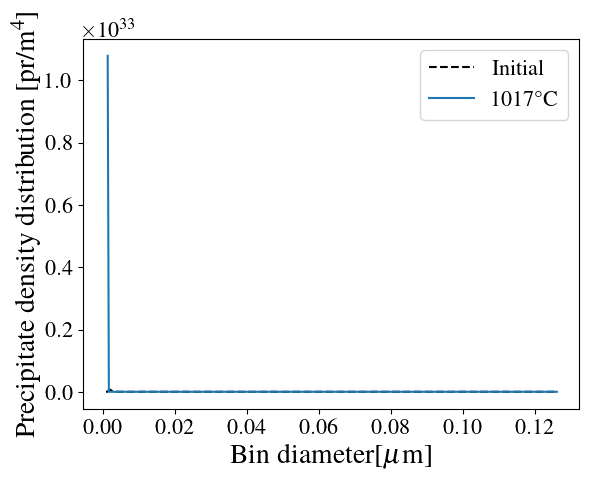

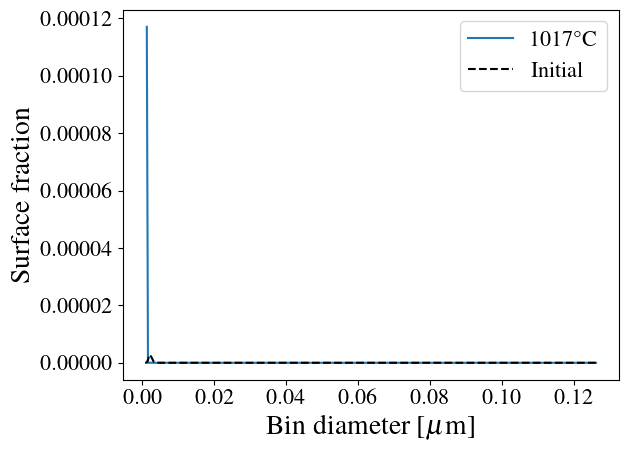

In [4]:

initial_precipitate_distribution=[]
leg=[]

suffix=[]
for j in range(len(strain_rate)):
    for i  in range(len(temperature_max)):
        #the suffix of the result files depends on the temperature and strain rate considered
        suffix.append("{temperature:4}C_strain_rate{str:3.3E}.txt".format(temperature=temperature_max[i], str=strain_rate[j]))
#print(suffix)

for j in range(len(strain_rate)):
    for i  in range(len(temperature_max)):
   # for i in [1]:
     
        
        #load and display the initial precipitate distribution
        plt.figure(1)
        file_name= "{pre}initial_precipitation_distribution_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        print(file_name)
        data_0=np.genfromtxt(file_name, skip_header=1)
        radius_bin=data_0[:,0]
        precipitate_density_0=data_0[:,1]
        if i==0:
            f=plt.plot(radius_bin*1e6*2, precipitate_density_0,'--', color='k', label='Initial' )
        else:
            f=plt.plot(radius_bin*1e6*2, precipitate_density_0,'--', color='k' )
        #load and display the final precipitate distribution
        file_name= "{pre}precipitation_distribution_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        data_0=np.genfromtxt(file_name, skip_header=1)
        final_precipitate_density=data_0[0:-1]
        count_figure=count_figure+1
        plt.plot(radius_bin*1e6*2, final_precipitate_density,  label=' {t}°C'.format(t=temperature_max[i]))
        leg.append("{temperature}°C".format(temperature=temperature_max[i]))
        plt.legend()
        plt.xlabel('Bin diameter[$\mu$m]')
        plt.ylabel('Precipitate density distribution [pr/m$^4$]')
        #plt.xlim([0,7 ])
        
        
        plt.figure(2)
        plt.plot(radius_bin*1e6*2, final_precipitate_density*4/3*np.pi*radius_bin**3*(radius_bin[1]-radius_bin[0]),  label=' {t}°C'.format(t=temperature_max[i]))
        plt.xlabel('Surface fraction')
        plt.ylabel('Precipitate density distribution [AU]')
        plt.plot(radius_bin*1e6*2, precipitate_density_0*4/3*np.pi*radius_bin**3*(radius_bin[1]-radius_bin[0]),'--k',  label='Initial'.format(t=temperature_max[i]))
        plt.ylabel('Surface fraction')
        plt.xlabel('Bin diameter [$\mu$m]')
        #plt.xlim([0,7 ])
        plt.legend()
    


In [5]:
#display the KWN parameters
for j in range(len(strain_rate)):

    file_name= "{pre}KWN_parameters_{end}".format(pre=prefix,end=suffix[j])
    with open(file_name, 'r') as f:
        print(f.read())
    
    print('')
    print('')

  
 KWN parameters
  
Interfacial energy:   0.090 J/m^2
Migration energy:                   0.256000E+06 J/mol
D0:                   0.430000E-05 m^2/s
  
 Initial distribution
Initial mean radius:                   0.100000E-08 m
Initial mean radius:                   0.000000E+00 m
Initial volume fraction:   0.000
Initial volume fraction:   0.000
Shape parameter:   0.200
Shape parameter:   0.150
  
Starting bin :                  -0.950000E+01 m
Bin width :                   0.100000E+00 m
Number of steps :   23
  
 Vacancy model parameters 
Vacancy formation energy:   0.520 [eV]
Vacancy migration energy:   0.930 [eV]
Pre-factor diffusion vacancy:                   0.100000E-04 [m^2/s]
Mechanical vacancy production constant:   0.035 []
Vacancy sink spacing (grain size):                   0.500000E-04 [m]
Jog formation energy:   0.300 [eV]
Dislocation arrangement parameter:  10.000 []
Initial dislocation density:                   0.100000E+15 [/m^2]
Saturation dislocation density:   

In [6]:
time=[]
mean_radius=[]
precipitate_density=[]
vf=[]
nucleation_rate=[]
critical_radius=[]
concentration_matrix=[]
growth_rate=[]


for j in range(len(strain_rate)):
#for j in [1]   : 
    for i  in range(len(temperature_max)):
    
       # print(j)
        file_name= "{pre}kinetics_data_{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        
       # print(file_name)
        data=[]
        data=np.genfromtxt(file_name, skip_header=2)
        time.append(data[:,0])
        mean_radius.append(data[:,1]) #nm 
        
        precipitate_density.append(data[:,2]) #/micron^3
        vf.append(data[:,3]) #
        nucleation_rate.append(data[:,5]) #per micron^3
        critical_radius.append(data[:,4]) #nm
        concentration_matrix.append(data[:,6]) #
        growth_rate.append(np.diff(data[:,1])/np.diff(data[:,0]))
        #print(concentration_matrix)

       # print(time)

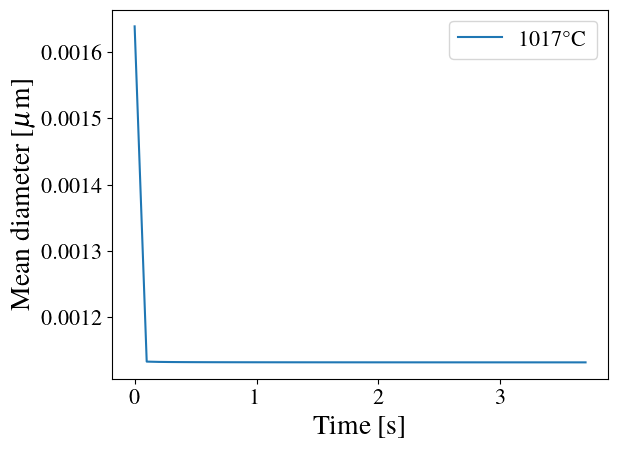

In [7]:
j=0 #without deformation
leg=[]
f_radius=[]
for j in range(len(strain_rate)):
#for j in [0]:
        
    
       
    for i  in range(len(temperature_max)):
        leg.append("Temperature : {t}".format(t=temperature_max[i]))
        
        #plt.figure(i)
        plt.xlabel('Strain')
        plt.ylabel('Mean Radius [nm]')
        
        #for j in [3]:
        f1=plt.plot(time[len(temperature_max)*j+i], mean_radius[len(temperature_max)*j+i]/1000*2, label=' {t}°C'.format(t=temperature_max[i]))
        colour=f1[0].get_color()
        #f1=plt.plot(time[len(temperature_max)*j+i], critical_radius[len(temperature_max)*j+i], '--', color=colour)
        
            #f1=plt.plot(time[len(temperature_max)*j+i], mean_radius[len(temperature_max)*j+i]*np.sqrt(3/5), '--', color=colour)
             #print(max(mean_radius[3*j+i])-min(mean_radius[3*j+i]))
        plt.legend(leg)  
        #plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
       # plt.xlim([0,(temperature_max[i]-20)/heating_rate+30])
        file_name='experimental/time_radius_{t}.txt'.format(t=temperature_max[i])
        if os.path.isfile(file_name):
            experimental_radius=np.genfromtxt(file_name)
            print(experimental_radius)
            plt.plot(experimental_radius[:,0],experimental_radius[:,1],'o', color=colour)
        plt.legend()  
        f_radius.append(interpolate.interp1d(time[len(temperature_max)*j+i],mean_radius[len(temperature_max)*j+i]/1000))
       # plt.ylim([1.12,1.2])
    #f2=plt.plot(time[0], critical_radius[0],'--k')
#plt.figure(1)
plt.xlabel('Time [s]')
plt.ylabel('Mean diameter [$\mu$m]')
plt.legend()
#plt.xlim([10**0.5, 10**4.5])
#plt.xlim([0,15000])


plt.draw
plt.show
plt.savefig('results/fig_mean_radius.jpeg'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')


/tmp/ipykernel_233535/1257657795.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.draw()


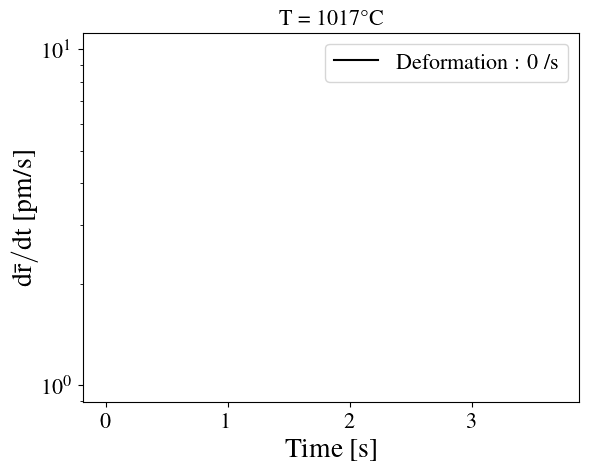

<Figure size 640x480 with 0 Axes>

In [8]:
#%matplotlib qt 
#%matplotlib inline
j=0 #without deformation
heating_rate=5
for i  in [0]:
        for j in range(len(strain_rate)):
            t_bis= np.linspace(min(time[len(temperature_max)*j+i]),max(time[len(temperature_max)*j+i]),1000   )
           # print(t_bis)
            dt = t_bis[1]-t_bis[0]
            dydt = np.gradient(f_radius[len(temperature_max)*j+i](t_bis)*1000, dt)
            colour=f1[0].get_color()
            f1=plt.semilogy(t_bis,dydt, 'k', label='Deformation : {s} /s'.format(s=strain_rate[j]))
            y=dydt
            z=[0, max(y)*1.1]
            plt.legend()
            plt.show
            plt.xlabel('Time [s]')
            plt.ylabel(r'$\rm{d} \bar{r}/dt$ [pm/s]')
            plt.title('T = {t}°C'.format(t=temperature_max[i]))
            plt.draw()
            plt.show()


plt.savefig('fig_growth_rate_with_without_deformation_{s}_{t}.pdf'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')



vf initial 8.55673e-06


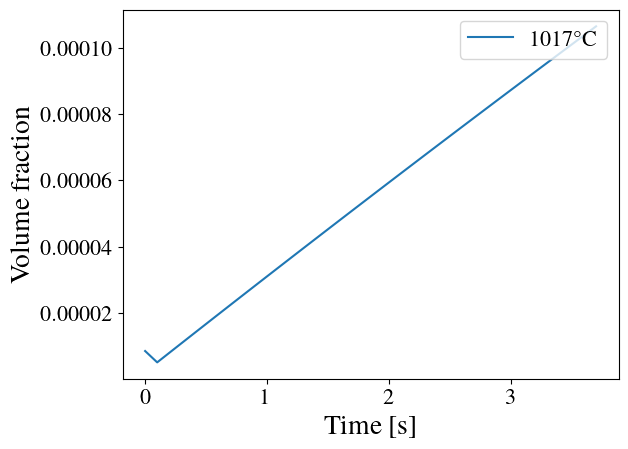

In [9]:
j=0 #without deformation
leg=[]
for j in range(len(strain_rate)):        
    leg.append("Strain rate : {strain_rate}".format(strain_rate=strain_rate[j]))
       
    for i  in range(len(temperature_max)): 

      #  plt.figure(i)
        plt.xlabel('Time [s]')
        plt.ylabel('Volume fraction')        
        #for j in [3]:
        f1=plt.plot(time[len(temperature_max)*j+i], vf[len(temperature_max)*j+i], label=' {t}°C'.format(t=temperature_max[i]))
        colour=f1[0].get_color()
        
        file_name='experimental/time_vf_{t}.txt'.format(t=temperature_max[i])
        if os.path.isfile(file_name):
            experimental_vf=np.genfromtxt(file_name)
            print(experimental_vf)
            plt.plot(experimental_vf[:,0],experimental_vf[:,1]/100,'o', color=colour)
        plt.legend(loc='upper right')  
        #plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
     #   plt.xlim([1,1000])
        print('vf initial', vf[len(temperature_max)*j+i][0]) 
#plt.xlim([0,15000])
plt.savefig('results/fig_volume_fraction.png'.format(s=strain_rate[j], t=temperature_max[i]),bbox_inches='tight')


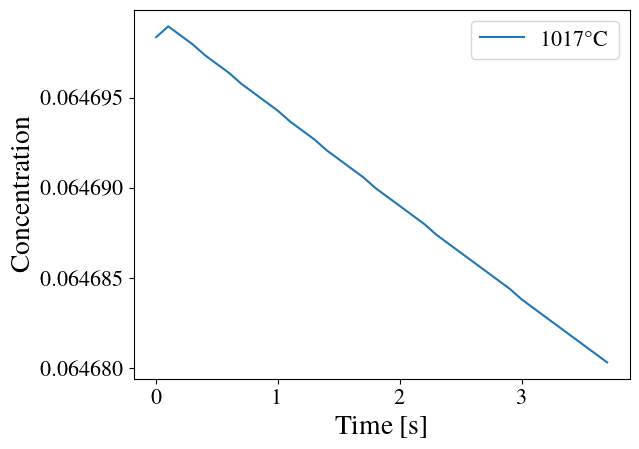

In [10]:
j=0 #without deformation
leg=[]
for j in range(len(strain_rate)):        
    leg.append("Strain rate : {strain_rate}".format(strain_rate=strain_rate[j]))
       
    for i  in range(len(temperature_max)): 


      #  plt.figure(i)
        plt.xlabel('Time [s]')
        plt.ylabel('Concentration')        
        #for j in [3]:
        f1=plt.plot(time[len(temperature_max)*j+i], concentration_matrix[len(temperature_max)*j+i],  label=' {t}°C'.format(t=temperature_max[i]))
        colour=f1[0].get_color()
        plt.legend()  
        #plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
     #   plt.xlim([1,1000])

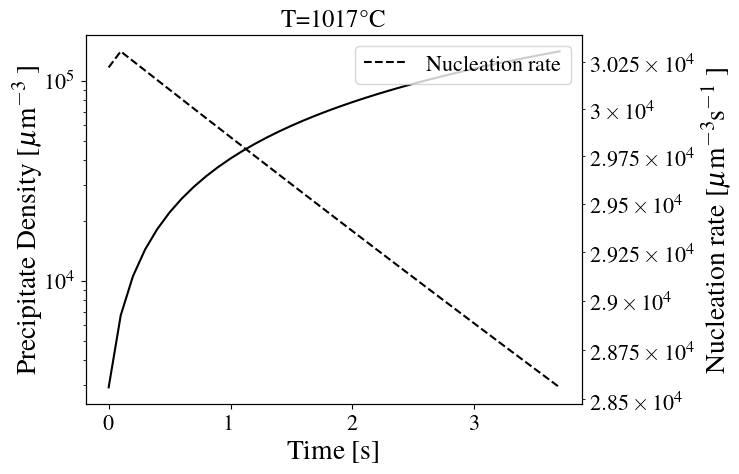

In [11]:

j=0 #without deformation
leg=[]
for j in range(len(strain_rate)):        
    leg.append("Strain rate : {strain_rate}".format(strain_rate=strain_rate[j]))
       
    for i  in range(len(temperature_max)):        
        fig,ax = plt.subplots()
        plt.xlabel('Time [s]')
        plt.ylabel('Precipitate Density [$\mu$m$^{-3}$ ]')        
        #for j in [3]:
        plt.semilogy(time[len(temperature_max)*j+i], precipitate_density[len(temperature_max)*j+i], 'k', label='Number density')
        colour=f1[0].get_color()
       
        plt.title('T={temperature}°C'.format(temperature=temperature_max[i]), fontsize=18 )
        ax2=ax.twinx()
        ax2.semilogy(time[len(temperature_max)*j+i], nucleation_rate[len(temperature_max)*j+i], '--k',label='Nucleation rate')
        plt.ylabel('Nucleation rate [$\mu$m$^{-3}$s$^{-1}$ ]')
#plt.xlim([10**0.5, 10**4.5])   
plt.legend()

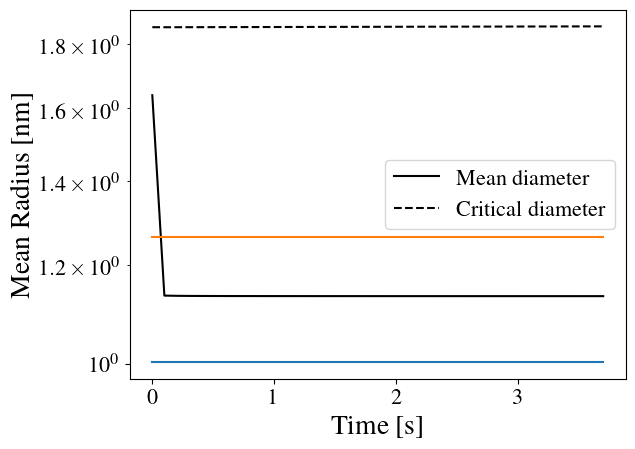

In [12]:
j=0 #without deformation
leg=[]
f_radius=[]
for j in range(len(strain_rate)):
#for j in [0]:
        
    
       
    for i  in range(len(temperature_max)):
        leg.append("Temperature : {t}".format(t=temperature_max[i]))
        
        #plt.figure(i)
        plt.xlabel('Time [s]')
        plt.ylabel('Mean Radius [nm]')
        
        #for j in [3]:
        f1=plt.semilogy(time[len(temperature_max)*j+i], mean_radius[len(temperature_max)*j+i]*2,'k', label='Mean diameter'.format(t=temperature_max[i]))
        f1=plt.semilogy(time[len(temperature_max)*j+i], critical_radius[len(temperature_max)*j+i]*2, '--k', label='Critical diameter '.format(t=temperature_max[i]))
        plt.semilogy([time[len(temperature_max)*j+i][0],time[len(temperature_max)*j+i][-1]] ,[radius_bin[1]*2e9, radius_bin[1]*2e9])
        plt.semilogy([time[len(temperature_max)*j+i][0],time[len(temperature_max)*j+i][-1]] ,[radius_bin[2]*2e9, radius_bin[2]*2e9])
plt.legend()

In [13]:

for j in range(len(strain_rate)):
    #for i  in range(len(temperature_max)):
    for i in [0]:
     
        
        #load and display the initial precipitate distribution
        plt.figure(1)
        file_name= "{pre}equilibrium_concentration_interface{suffix}".format(pre=prefix,suffix=suffix[len(temperature_max)*j+i])
        print(file_name)
        data_0=np.genfromtxt(file_name, skip_header=1)
        radius_bin=data_0[:,0]
        precipitate_density_0=data_0[:,1]

        f=plt.semilogx(radius_bin*1e9*2, precipitate_density_0,'--', color='k' )
        plt.ylabel('Equilibrium concentration interface')
        plt.xlabel('Precipitate diameter [nm]')

    


results/equilibrium_concentration_interface1017C_strain_rate0.000E+00.txt


OSError: results/equilibrium_concentration_interface1017C_strain_rate0.000E+00.txt not found.

<Figure size 640x480 with 0 Axes>